# Sales Analysis Project

###### import necessary libraries

In [159]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter


##### merging 12 months of Data into a single file

In [160]:
files = [file for file in os.listdir('G:/Sales Project')]
all_months_data = pd.DataFrame()

for file in files:
    df= pd.read_csv("G:/Sales Project/"+file)
    all_months_data= pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

In [161]:
all_data= pd.read_csv("G:/Sales Project/all_data.csv")
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


### Cleaning of Data

##### clean up the data i.e removing NaN terms

In [162]:
nan_df= all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data= all_data.dropna(how='any')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### finding Or and deleting it.

In [163]:
all_data= all_data[all_data['Order Date'].str[0:2] != 'Or']

##### assigning correct datatype to the columns

In [164]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int32')
all_data['Price Each']=all_data['Price Each'].astype('float')


### Augmenting Data

##### adding extra column to define the month of the order

In [165]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Adding a Sales Column

In [166]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Question: What was the best month for sales & How much was earned for that?

In [167]:
result=all_data.groupby('Month').sum()
result.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75


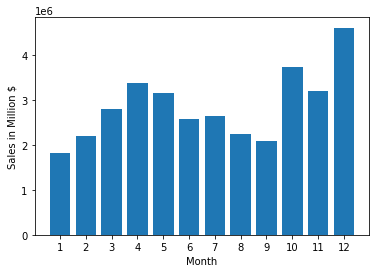

In [168]:
Months = range(1,13)
plt.bar(Months,result['Sales'])
plt.xticks(Months)
plt.ylabel('Sales in Million $')
plt.xlabel('Month')
plt.show()

### Question: Which City had the Highest number of Sales?

##### adding a column for the name of city

In [169]:
all_data['City']=all_data['Purchase Address'].apply(lambda x: x.split(',')[1]+' '+x.split(',')[2][0:3]) 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [170]:
result1=all_data.groupby('City').sum()
result1

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


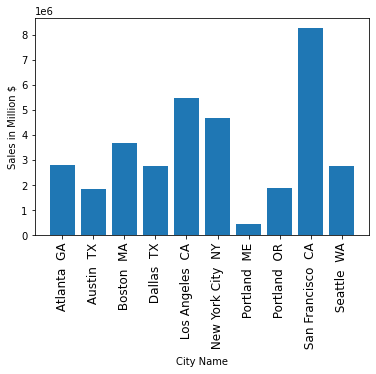

In [171]:
Cities = [city for city, lb in all_data.groupby('City')]
plt.bar(Cities,result1['Sales'])
plt.xticks(Cities, rotation='vertical', size=12)
plt.ylabel('Sales in Million $')
plt.xlabel('City Name')
plt.show()

### Question: What time should we display advertisements to maximize likelihood of customer's buying product?

In [77]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data['Hour']= all_data['Order Date'].dt.hour
all_data['Minute']= all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [84]:
hours = [hour for hour, xy in all_data.groupby('Hour')]
all_data.groupby('Hour').count().head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854


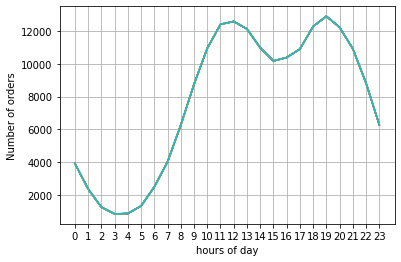

In [88]:
plt.plot(hours,all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('hours of day')
plt.ylabel('Number of orders')
plt.grid()

###  Question: What products are often ordered together? 

In [173]:
ab=all_data[all_data['Order ID'].duplicated(keep=False)]

In [174]:
ab['Grouped']=ab.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
ab=ab[['Order ID','Grouped']].drop_duplicates()
ab.head()



C:\Users\SHIVNA~1\AppData\Local\Temp/ipykernel_19320/320452198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab['Grouped']=ab.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [113]:
count= Counter()
for row in ab['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question: Which product sold the most & why?

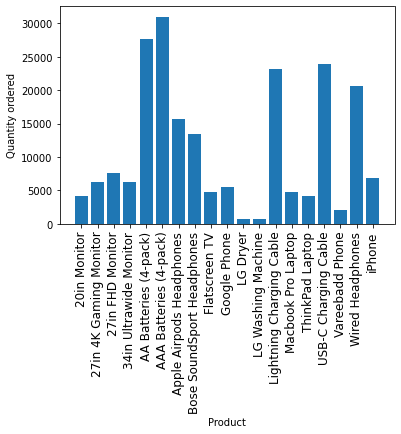

In [180]:
product_group=all_data.groupby('Product')
quantity=product_group.sum()['Quantity Ordered']
products=[product for product, pq in product_group]
plt.ylabel('Quantity ordered')
plt.xlabel('Product')
plt.bar(products,quantity)
plt.xticks(products, rotation='vertical', size=12)
plt.show()

C:\Users\SHIVNA~1\AppData\Local\Temp/ipykernel_19320/297768469.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


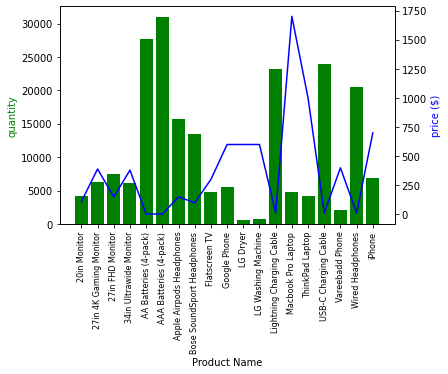

In [187]:
prices= all_data.groupby('Product').mean()['Price Each']

fig, ax1= plt.subplots()
 

ax2= ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('quantity', color='g')
ax2.set_ylabel('price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)



plt.show()